# SRW

## Prepare Bluesky and trigger a simulated Sirepo detector in SRW


Start ``ipython`` and run the code in the following cell. Note that ``sim_id`` may be replaced by the identifier for any supported Sirepo simulation (**Hint:** See the "List of predefined simulations in Sirepo" sections for examples of identifiers for different beamlines).



Transient Scan ID: 1     Time: 2021-12-14 15:36:23
Persistent Unique Scan ID: 'f1656479-7e83-4328-9ef3-6dfc9a4c6f04'
New stream: 'primary'
+-----------+------------+--------------------------------+--------------+
|   seq_num |       time | Aperture_sirepo_horizontalSize | srw_det_mean |
+-----------+------------+--------------------------------+--------------+
|         1 | 15:36:28.0 |                          0.000 |        0.000 |
|         2 | 15:36:32.2 |                          0.025 | 26308627145980.469 |
|         3 | 15:36:36.4 |                          0.050 | 53078019985587.875 |
|         4 | 15:36:40.6 |                          0.075 | 79416313384794.328 |
|         5 | 15:36:44.8 |                          0.100 | 117643347136211.078 |
|         6 | 15:36:49.0 |                          0.125 | 141980447129248.219 |
|         7 | 15:36:53.2 |                          0.150 | 165182853921254.469 |
|         8 | 15:36:57.5 |                          0.175 | 1870852295

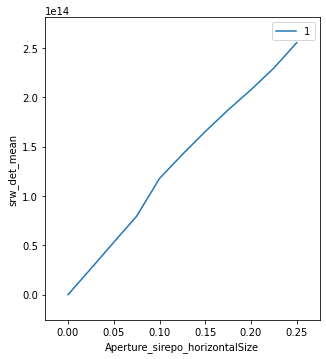

In [1]:
%run -i ../../examples/prepare_det_env.py

import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp

sim_id = '0000000-'

srw_det = sd.SirepoSRWDetector(sim_id=sim_id, sim_type='srw',
                                sirepo_server='http://localhost:8000',
                                root_dir='/tmp/sirepo-bluesky-data')

srw_det.select_optic('Aperture')
param1 = srw_det.create_parameter('horizontalSize')
param2 = srw_det.create_parameter('verticalSize')
srw_det.configuration_attrs = ['horizontal_extent', 'vertical_extent', 'shape']
uid, = RE(bp.scan([srw_det], param1, 0, .25, 11))

In [10]:
sim_id = '00000001'

We can access the data as the last item in the database (db[-1]), which when plotted as an image will look like:

In [11]:
hdr = db[-1]
hdr.table()

,time,Aperture_sirepo_horizontalSize,Aperture_sirepo_horizontalSize_setpoint,srw_det_image,srw_det_shape,srw_det_mean,srw_det_photon_energy,srw_det_horizontal_extent,srw_det_vertical_extent,srw_det_sirepo_json
seq_num,,,,,,,,,,
1,2021-12-14 20:36:28.072677135,0.000,0.000,73e739f5-1604-4581-9f44-a8f573374553/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]","{""models"": {""arbitraryMagField"": {""interpolati..."
2,2021-12-14 20:36:32.295799017,0.025,0.025,1b64e0fc-98ea-484e-9f55-045e396823d4/0,"[160, 70]",2.630863e+13,9000.0,"[-0.0002053703619142305, 0.0002053703619142305]","[-0.0003071728019585904, 0.00030717280195859017]","{""models"": {""arbitraryMagField"": {""interpolati..."
3,2021-12-14 20:36:36.492445946,0.050,0.050,3c887961-1496-404d-9ae6-dbdc6703fdd2/0,"[160, 70]",5.307802e+13,9000.0,"[-0.00020324612942849957, 0.00020324612942849957]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
4,2021-12-14 20:36:40.691241026,0.075,0.075,36218b65-b2b1-4762-aa87-d0060fb09de9/0,"[160, 70]",7.941631e+13,9000.0,"[-0.00020319159897368846, 0.0002031915989736884]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
5,2021-12-14 20:36:44.878309011,0.100,0.100,9ab0d99f-0f9e-4710-ac8e-98509dc9b693/0,"[160, 70]",1.176433e+14,9000.0,"[-0.00020446574938460526, 0.00020446574938460526]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
6,2021-12-14 20:36:49.091471910,0.125,0.125,fdcd2ae4-918b-4e91-a6dd-6c36eb10dba0/0,"[160, 70]",1.419804e+14,9000.0,"[-0.00020592277713516027, 0.00020592277713516022]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
7,2021-12-14 20:36:53.288965940,0.150,0.150,30cf31a0-e506-46b6-a72b-ebb01ed7eef2/0,"[160, 70]",1.651829e+14,9000.0,"[-0.00020780051885021354, 0.00020780051885021354]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
8,2021-12-14 20:36:57.513823032,0.175,0.175,14e515fa-d79e-44b2-b37d-1ed5f23b8db1/0,"[160, 70]",1.870852e+14,9000.0,"[-0.0002100820244934989, 0.0002100820244934989]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."
9,2021-12-14 20:37:01.730952024,0.200,0.200,99122c5f-0df5-4353-bcfb-6a812628766b/0,"[160, 70]",2.075446e+14,9000.0,"[-0.00021276160945111347, 0.00021276160945111347]","[-0.00030717280243331037, 0.00030717280243331026]","{""models"": {""arbitraryMagField"": {""interpolati..."


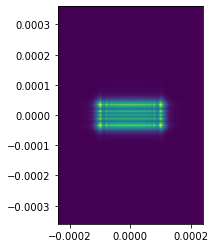

In [12]:
hdr = db[-1]
imgs = list(hdr.data(f'{srw_det.name}_image'))
cfg = hdr.config_data(srw_det.name)['primary'][0]
hor_ext = cfg[f'{srw_det.name}_horizontal_extent']
vert_ext = cfg[f'{srw_det.name}_vertical_extent']
plt.imshow(imgs[-2], aspect='equal', extent=(*hor_ext, *vert_ext))

To view single-electron spectrum report (**Hint:** use a different
``sim_id``, e.g. for the NSLS-II CHX beamline example):

In [18]:

%run -i ../../examples/prepare_det_env.py

import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp

sim_id  = '00000000' # NSLS-II CHX beamline

srw_det = sd.SirepoSRWDetector(sim_id=sim_id, sim_type='srw', source_simulation=True,
                            sirepo_server='http://localhost:8000',
                            root_dir='/tmp/sirepo-bluesky-data')

srw_det.configuration_attrs = ['photon_energy', 'shape']

uid, = RE(bp.count([srw_det]))



Transient Scan ID: 1     Time: 2021-12-14 15:39:26
Persistent Unique Scan ID: '189c8784-f067-4a96-a141-9fbfef61d3c0'
New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | srw_det_mean |
+-----------+------------+--------------+
|         1 | 15:39:31.0 | 9721365919945.510 |
+-----------+------------+--------------+
generator count ['189c8784'] (scan num: 1)





We can observe the produced spectrum as 

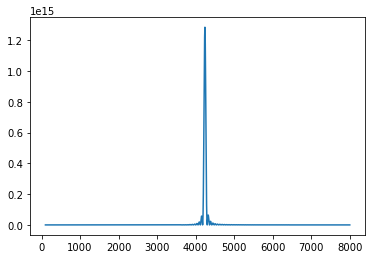

In [19]:
hdr = db[-1]
cfg = hdr.config_data(srw_det.name)['primary'][0]
energies = cfg[f'{srw_det.name}_photon_energy']
spectrum, = hdr.data(f'{srw_det.name}_image')
plt.plot(energies, spectrum)

## Use a simulated Sirepo Flyer to run multiple simulations

This section is based on the Young's Double Slit Experiment Sirepo example
that can be found in the wavefront propagation folder on the SRW simulations
section

Open the simulation and grab the new UID (the last 8 alphanumeric symbols), then start ``ipython`` and run the following:

In [28]:
%run -i ../../examples/prepare_flyer_env.py

import bluesky.plans as bp
import sirepo_bluesky.sirepo_flyer as sf

We can reate 5 different simulations that change 4 parameters at a time

In [29]:
params_to_change = []
for i in range(1, 4):
    key1 = 'Aperture'
    parameters_update1 = {'horizontalSize': i * .1, 'verticalSize': (16 - i) * .1}
    key2 = 'Lens'
    parameters_update2 = {'horizontalFocalLength': i + 7}
    key3 = 'Obstacle'
    parameters_update3 = {'horizontalSize': 6 - i}
    params_to_change.append({key1: parameters_update1,
                                key2: parameters_update2,
                                key3: parameters_update3})

To create the flyer and run a fly scan, where ``sim_id`` is the UID of this simulation, we run

In [30]:
sim_id = '00000000' # Young's Double Slit Experiment

sirepo_flyer = sf.SirepoFlyer(sim_id=sim_id, server_name='http://localhost:8000',
                                      root_dir='/tmp/sirepo-bluesky-data', params_to_change=params_to_change,
                                      watch_name='W60')

RE(bp.fly([sirepo_flyer]))



Transient Scan ID: 1     Time: 2021-12-14 15:45:09
Persistent Unique Scan ID: 'cd71f980-3123-45bd-9646-17ad9e740b95'
copy 00000000 -> hNw7DtfH, Youngs Double Slit Experiment Bluesky
copy 00000000 -> WjHSLRe0, Youngs Double Slit Experiment Bluesky 2
copy 00000000 -> zJbwwZZO, Youngs Double Slit Experiment Bluesky 3
running sim hNw7DtfH
running sim WjHSLRe0
running sim zJbwwZZO
Status of sim hNw7DtfH: completed
Status of sim WjHSLRe0: completed
Status of sim zJbwwZZO: completed
New stream: 'sirepo_flyer'
copy hNw7DtfH data hash: d5d6628d50bd65a329717e8ffb942224
copy WjHSLRe0 data hash: d6f8b77048fe6ad48e007cfb776528ad
copy zJbwwZZO data hash: e5f914471d873f156c31815ab705575f





('cd71f980-3123-45bd-9646-17ad9e740b95',)

We access the data in the same manner as before

In [31]:
hdr = db[-1]
hdr.table(stream_name='sirepo_flyer')

,time,sirepo_flyer_image,sirepo_flyer_shape,sirepo_flyer_mean,sirepo_flyer_photon_energy,sirepo_flyer_horizontal_extent,sirepo_flyer_vertical_extent,sirepo_flyer_hash_value,sirepo_flyer_status,sirepo_flyer_Aperture_horizontalSize,sirepo_flyer_Aperture_verticalSize,sirepo_flyer_Lens_horizontalFocalLength,sirepo_flyer_Obstacle_horizontalSize
seq_num,,,,,,,,,,,,,
2,2021-12-14 20:45:35.436273813,21194044-4aff-49f4-a058-a5b581b92be3,"[250, 546]",9.944933e+13,4240.0,"[-0.001015813953488372, 0.0010120930232558139]","[-0.000249500998003992, 0.00024750499001996017]",d6f8b77048fe6ad48e007cfb776528ad,completed,0.2,1.4,9,4
1,2021-12-14 20:45:35.436273813,58365ebf-caeb-4afd-b9aa-5ac189dbd4b7,"[250, 896]",3.677965e+13,4240.0,"[-0.0013627376425855513, 0.0013596958174904943]","[-0.000249500998003992, 0.00024750499001996017]",d5d6628d50bd65a329717e8ffb942224,completed,0.1,1.5,8,5
3,2021-12-14 20:45:35.436273813,019ab161-1ecb-4e69-8d5a-1141d6df9b4c,"[250, 440]",1.492891e+14,4240.0,"[-0.0009701657458563539, 0.0009701657458563542]","[-0.00024650698602794426, 0.0002504990019960079]",e5f914471d873f156c31815ab705575f,completed,0.3,1.3,10,3


Leading/trailing empty lines: